<a href="https://colab.research.google.com/github/hyulianton/JaringanSyarafTiruan/blob/main/jst_Visualisasi_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sel 1: Import Library dan Definisi Kelas Perceptron
Sel ini berisi kode inti yang mendefinisikan struktur Perceptron. Kita mengimpor dua library utama: NumPy untuk operasi numerik dan Matplotlib untuk visualisasi.

In [ ]:
# Sel 1: Import library dan definisi kelas Perceptron
import numpy as np
# Mengimpor NumPy untuk operasi array, fundamental untuk komputasi ilmiah.
import matplotlib.pyplot as plt
# Mengimpor Matplotlib untuk membuat plot dan visualisasi.

class Perceptron:
    """
    Kelas yang mengimplementasikan algoritma Perceptron.
    """
    def __init__(self, learning_rate=0.1, n_iterations=100):
        # Konstruktor kelas.
        self.learning_rate = learning_rate
        # learning_rate (alpha): Kontrol seberapa cepat model belajar. Nilai kecil berarti langkah-langkah penyesuaian bobot lebih kecil.
        self.n_iterations = n_iterations
        # n_iterations: Jumlah seluruh siklus pelatihan pada dataset.
        self.weights = None
        # Bobot (weights): Parameter yang akan dipelajari untuk setiap fitur. Diinisialisasi di metode fit().
        self.bias = None
        # Bias: Parameter tambahan yang digabungkan ke output untuk membantu penyesuaian batas keputusan.

    def _step_function(self, x):
        # Fungsi aktivasi step atau fungsi Heaviside.
        # Mengembalikan 1 jika output linear lebih besar atau sama dengan nol, dan 0 sebaliknya. Ini mengubah output menjadi keputusan biner.
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        # Metode untuk melatih model Perceptron.
        n_samples, n_features = X.shape
        # Mendapatkan jumlah sampel (baris) dan fitur (kolom) dari data.
        self.weights = np.zeros(n_features)
        # Menginisialisasi bobot dengan array nol dengan ukuran yang sama dengan jumlah fitur.
        self.bias = 0
        # Menginisialisasi bias dengan nilai nol.

        for _ in range(self.n_iterations):
            # Loop utama untuk melatih model sebanyak n_iterations.
            for idx, x_i in enumerate(X):
                # Iterasi melalui setiap sampel dalam dataset.
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Menghitung output linear: (input * bobot) + bias. Ini adalah "skor" mentah sebelum aktivasi.
                y_predicted = self._step_function(linear_output)
                # Menerapkan fungsi step untuk mendapatkan prediksi biner.

                update = self.learning_rate * (y[idx] - y_predicted)
                # Menghitung seberapa besar bobot harus diperbarui. Ini didasarkan pada error (target - prediksi).
                self.weights += update * x_i
                # Memperbarui bobot. Bobot akan berubah hanya jika ada error (yaitu, update bukan nol).
                self.bias += update
                # Memperbarui bias.

    def predict(self, X):
        # Metode untuk membuat prediksi setelah model dilatih.
        linear_output = np.dot(X, self.weights) + self.bias
        # Menghitung output linear untuk data baru.
        return np.array([self._step_function(output) for output in linear_output])
        # Menerapkan fungsi step pada setiap output linear untuk menghasilkan prediksi akhir.

### Sel 2: Persiapan Data dan Latih Model
Sel ini menyiapkan data linier terpisah dan melatih model Perceptron yang telah kita definisikan.

In [ ]:
# Sel 2: Persiapan data dan latih model
# Dataset contoh yang dapat dipisahkan secara linier
# Input x1, x2 dan output y
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6],
              [1, 0], [2, 1], [3, 2], [4, 3], [5, 4]])
# X: Fitur input, setiap baris mewakili satu titik data dengan dua fitur (x1 dan x2).
y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
# y: Label kelas yang sesuai. Poin-poin di baris pertama adalah kelas 1, sisanya kelas 0.

# Latih model Perceptron
p = Perceptron(learning_rate=0.1, n_iterations=100)
# Membuat instance objek Perceptron dengan learning rate 0.1 dan 100 iterasi.
p.fit(X, y)
# Memulai proses pelatihan menggunakan data X dan y.

### Sel 3: Visualisasi Hasil
Sel terakhir ini berfokus pada visualisasi. Kita akan memplot data asli dan garis batas keputusan yang dipelajari oleh model.

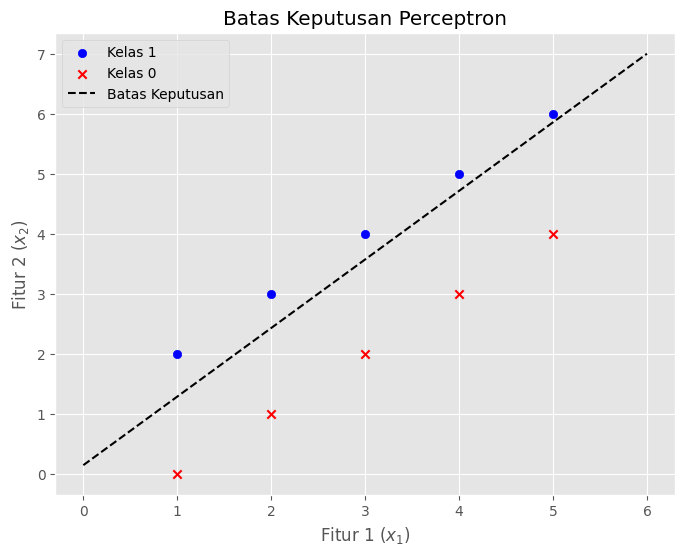


Bobot dan Bias yang Dilatih:
Bobot: [-0.8  0.7]
Bias: -0.1


In [ ]:
# Sel 3: Visualisasi hasil
# Menggunakan style plot yang menarik
plt.style.use('ggplot')
# Mengatur ukuran figure untuk tampilan yang lebih baik
plt.figure(figsize=(8, 6))

# Plot data poin
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', label='Kelas 1')
# Memplot semua titik data yang memiliki label y=1 dengan marker 'o' berwarna biru.
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='x', label='Kelas 0')
# Memplot semua titik data yang memiliki label y=0 dengan marker 'x' berwarna merah.

# Hitung dan plot decision boundary
# Menentukan batas sumbu x dan y untuk plot
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Menghitung nilai x1 untuk plot garis
x1_values = np.linspace(x1_min, x1_max, 100)
# Membuat array dari 100 nilai yang berjarak sama antara batas x1 minimum dan maksimum.

# Persamaan batas keputusan: w1*x1 + w2*x2 + b = 0
# Solusi untuk x2: x2 = (-w1*x1 - b) / w2
if p.weights[1] != 0:
    # Mencegah pembagian dengan nol jika bobot fitur kedua adalah nol.
    x2_values = (-p.weights[0] * x1_values - p.bias) / p.weights[1]
    # Menghitung nilai x2 yang sesuai untuk setiap x1, membentuk garis lurus batas keputusan.
    plt.plot(x1_values, x2_values, 'k--', label='Batas Keputusan')
    # Memplot garis batas keputusan dengan gaya garis putus-putus hitam.

# Menambahkan judul, label, dan legenda
plt.title('Batas Keputusan Perceptron')
plt.xlabel('Fitur 1 ($x_1$)')
plt.ylabel('Fitur 2 ($x_2$)')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan bobot dan bias yang telah dilatih
print("\nBobot dan Bias yang Dilatih:")
print(f"Bobot: {p.weights}")
print(f"Bias: {p.bias}")